<a href="https://colab.research.google.com/github/muhamadfadil316/MACHINE-LEARNING/blob/main/PraktikumMandiri07.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# menghubungan colab dengan google drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
# memanggil data set lewat gdrive
path = "/content/gdrive/MyDrive/Colab Notebooks/praktikum_ml/praktikum07"

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score, roc_auc_score,
    confusion_matrix, classification_report, RocCurveDisplay, ConfusionMatrixDisplay
)

In [4]:
df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/praktikum_ml/praktikum07/data/dataset_satelit.csv")
df.head()

,No,Longitude,Lattitude,N,P,K,Ca,Mg,Fe,Mn,...,b1,Sigma_VV,Sigma_VH,plia,lia,iafe,gamma0_vv,gamma0_vh,beta0_vv,beta0_vh
0,1,103.036658,-0.604417,2.64,0.15,0.415,0.51,0.31,119.96,463.23,...,0.0433,0.18183,0.04461,35.74446,35.79744,35.41161,0.22331,0.05479,0.31325,0.07686
1,2,103.037201,-0.604689,2.75,0.17,0.568,0.76,0.58,102.63,493.81,...,0.0465,0.22079,0.04640,35.12096,35.14591,35.41510,0.27116,0.05699,0.38033,0.07993
2,3,103.036359,-0.603012,1.77,0.12,0.339,0.49,0.6,107.37,460.93,...,0.0417,0.18926,0.03992,35.07724,35.07730,35.41135,0.23242,0.04902,0.32604,0.06876
3,4,103.036950,-0.603219,2.30,0.15,0.460,0.74,0.67,96.02,338.17,...,0.0367,0.14769,0.03622,36.08078,36.08469,35.41583,0.18138,0.04448,0.25440,0.06238
4,5,103.036802,-0.601969,2.05,0.14,0.308,0.64,0.72,87.01,384.33,...,0.0361,0.18205,0.03797,32.68855,32.69293,35.41592,0.22359,0.04664,0.31359,0.06541


In [5]:
#cek missing value
df.isnull().sum()

,0
No,0
Longitude,0
Lattitude,0
N,0
P,0
K,1
Ca,0
Mg,0
Fe,0
Mn,0


In [6]:
# Menghitung statistik deskriptif pada kolom numeric dengan des
df.describe()

,No,Longitude,Lattitude,N,P,K,Ca,Fe,Mn,Cu,...,b1,Sigma_VV,Sigma_VH,plia,lia,iafe,gamma0_vv,gamma0_vh,beta0_vv,beta0_vh
count,594.000000,594.000000,594.000000,594.000000,594.000000,593.000000,594.000000,594.000000,594.000000,594.000000,...,594.000000,594.000000,594.000000,594.000000,594.000000,594.000000,594.000000,594.000000,594.000000,594.000000
mean,297.500000,106.878644,-1.024933,2.259091,0.141380,0.582175,0.595094,74.613771,308.034697,2.391195,...,0.177291,0.234474,0.102789,28.640422,28.664891,28.609569,0.202587,0.051524,0.269642,0.062320
std,171.617307,4.949840,0.965349,0.395499,0.019782,0.222567,0.366118,55.579655,241.731643,1.580296,...,0.155615,0.070516,0.112310,15.325347,15.380384,15.329170,0.104357,0.012959,0.143728,0.024218
min,1.000000,102.760857,-2.333750,1.140000,0.090000,0.122000,0.050000,21.080000,3.160000,0.090000,...,0.014100,0.115170,0.021460,0.127000,0.098600,0.026000,0.008700,0.016900,0.009300,0.016300
25%,149.250000,102.927811,-2.233338,1.982500,0.130000,0.429000,0.320000,40.705000,124.015000,1.172500,...,0.046925,0.183210,0.039535,31.959745,31.968948,33.685353,0.183085,0.040250,0.244935,0.052772
50%,297.500000,103.581969,-0.602276,2.280000,0.140000,0.549000,0.540000,65.650000,239.445000,2.225000,...,0.072700,0.213385,0.046550,35.067930,35.110415,34.611565,0.233590,0.050415,0.310380,0.068380
75%,445.750000,113.403797,-0.257349,2.570000,0.150000,0.710000,0.790000,87.372500,434.990000,3.357500,...,0.318900,0.262242,0.059190,38.319135,38.441065,39.002760,0.271790,0.060410,0.364505,0.079020
max,594.000000,113.434700,0.069251,3.230000,0.220000,1.489000,2.820000,559.100000,2009.320000,8.170000,...,0.751400,0.512210,0.373000,47.592900,48.014640,39.209330,0.658960,0.122300,0.814170,0.150620


In [7]:
# Cell 3 - Deteksi kolom b1..b12 (case-insensitive) dan kolom target 'N'
# Kode ini mencari kolom yang cocok pola b<number> dan mengurutkannya dari b1..b12.
import re

cols = df.columns.tolist()
# cari nama kolom yang match b<number> (mis: b1, B2, b12)
b_cols = []
for c in cols:
    m = re.match(r'(?i)^b(\d+)$', c.strip())
    if m:
        b_cols.append((int(m.group(1)), c))
# urutkan berdasarkan nomor (ascending)
b_cols = [c for (_, c) in sorted(b_cols, key=lambda x: x[0])]

print("Ditemukan kolom b:", b_cols)

# Tentukan nama target
possible_targets = ['N', 'n', 'nilai_N', 'nilai_n']  # tambahan kemungkinan
target_col = None
for t in possible_targets:
    if t in cols:
        target_col = t
        break
if target_col is None and 'N' in cols:
    target_col = 'N'
if target_col is None:
    raise KeyError("Kolom target 'N' tidak ditemukan. Periksa nama kolom di dataset.")

print("Target yang dipakai:", target_col)

Ditemukan kolom b: ['b1', 'b2', 'b3', 'b4', 'b5', 'b6', 'b7', 'b8', 'b9', 'b11', 'b12']
Target yang dipakai: N


In [8]:
# Cell 4 - Pastikan kita mengecualikan kolom yang tidak diinginkan
exclude = ['longitude', 'Latitude', 'latitude', 'Longitude', 'plia', 'lia', 'iafe']
# buat versi lower untuk pengecekan
cols_lower = {c.lower(): c for c in df.columns}

for ex in exclude:
    if ex.lower() in cols_lower:
        print("Kecualikan kolom:", cols_lower[ex.lower()])

# Final features: gunakan b_cols yang sudah ditemukan, tapi pastikan None-nya dihapus
features = [c for c in b_cols if c in df.columns]
if len(features) == 0:
    raise KeyError("Tidak ditemukan kolom b1..b12. Pastikan dataset memiliki nama kolom seperti b1, b2, ..., b12.")

print("Fitur yang akan dipakai:", features)

Kecualikan kolom: Longitude
Kecualikan kolom: Longitude
Kecualikan kolom: plia
Kecualikan kolom: lia
Kecualikan kolom: iafe
Fitur yang akan dipakai: ['b1', 'b2', 'b3', 'b4', 'b5', 'b6', 'b7', 'b8', 'b9', 'b11', 'b12']


In [9]:
# Cell 5 - Cek missing values pada fitur dan target
display(df[features + [target_col]].isna().sum())

# Pilihan: drop row yang missing di fitur atau target
df_model = df[features + [target_col]].copy().dropna()
print("Shape setelah dropna:", df_model.shape)

,0
b1,0
b2,0
b3,0
b4,0
b5,0
b6,0
b7,0
b8,0
b9,0
b11,0


Shape setelah dropna: (594, 12)


In [10]:
# Cell 6 - Split data train/test
X = df_model[features]
y = df_model[target_col]

# Atur random_state agar hasil reproduktif
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Train shape:", X_train.shape, "Test shape:", X_test.shape)

Train shape: (475, 11) Test shape: (119, 11)


In [11]:
# Cell 7 - Fit model menggunakan statsmodels OLS (menyertakan intercept)
# Kita gabung X_train dan y_train untuk formula, supaya mudah lihat summary

import statsmodels.formula.api as smf

train_df_for_sm = pd.concat([X_train.reset_index(drop=True), y_train.reset_index(drop=True)], axis=1)

# Gunakan Q("nama_kolom") agar aman untuk nama kolom seperti b1, b2, dst
formula = f'Q("{target_col}") ~ ' + ' + '.join([f'Q("{c}")' for c in features])
print("Formula:", formula)

# Fit model OLS
model_sm = smf.ols(formula=formula, data=train_df_for_sm).fit()

# Tampilkan hasil ringkasan
print(model_sm.summary())

Formula: Q("N") ~ Q("b1") + Q("b2") + Q("b3") + Q("b4") + Q("b5") + Q("b6") + Q("b7") + Q("b8") + Q("b9") + Q("b11") + Q("b12")
                            OLS Regression Results                            
Dep. Variable:                 Q("N")   R-squared:                       0.552
Model:                            OLS   Adj. R-squared:                  0.541
Method:                 Least Squares   F-statistic:                     51.78
Date:                Fri, 07 Nov 2025   Prob (F-statistic):           1.41e-73
Time:                        16:03:05   Log-Likelihood:                -42.809
No. Observations:                 475   AIC:                             109.6
Df Residuals:                     463   BIC:                             159.6
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
---

In [12]:
# Cell 8 - Prediksi pada test set dan evaluasi (R2, RMSE)
# Prediksi menggunakan statsmodels (perlu menambahkan konstanta jika memakai arrays)

from sklearn.metrics import r2_score, mean_squared_error

X_test_sm = X_test.copy()
# statsmodels' predict bisa menerima dataframe asalkan kolom cocok
y_pred_sm = model_sm.predict(X_test_sm)

r2 = r2_score(y_test, y_pred_sm)
rmse = np.sqrt(mean_squared_error(y_test, y_pred_sm))
print(f"R^2 (test): {r2:.4f}")
print(f"RMSE (test): {rmse:.4f}")

R^2 (test): 0.5413
RMSE (test): 0.2636


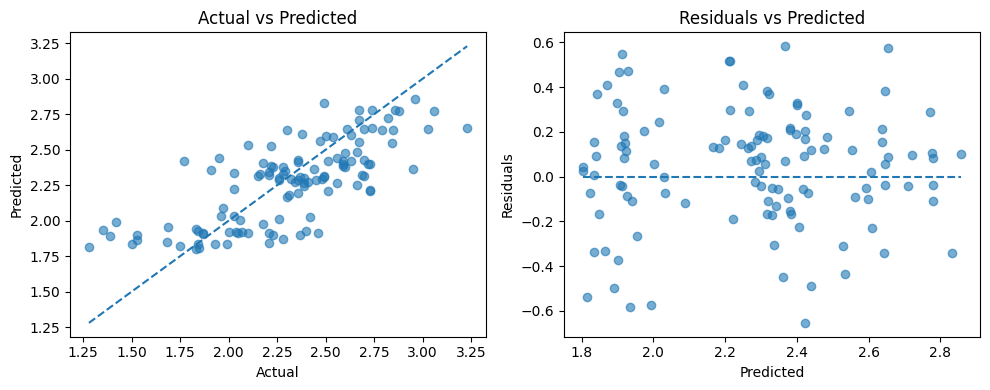

In [13]:
# Cell 9 - Visualisasi: Prediksi vs Aktual dan Residuals
plt.figure(figsize=(10,4))

plt.subplot(1,2,1)
plt.scatter(y_test, y_pred_sm, alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], linestyle='--')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted')

plt.subplot(1,2,2)
residuals = y_test - y_pred_sm
plt.scatter(y_pred_sm, residuals, alpha=0.6)
plt.hlines(0, xmin=y_pred_sm.min(), xmax=y_pred_sm.max(), linestyles='--')
plt.xlabel('Predicted')
plt.ylabel('Residuals')
plt.title('Residuals vs Predicted')

plt.tight_layout()
plt.show()

In [14]:
# Cell 10 - (Opsional) Fit model sklearn LinearRegression & bandingkan koefisien
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)

print("Sklearn R2:", r2_score(y_test, y_pred_lr))
print("Sklearn RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_lr)))

# Tampilkan koefisien
coef_df = pd.DataFrame({'feature': features, 'coef_sklearn': lr.coef_})
display(coef_df)

Sklearn R2: 0.5412672553866442
Sklearn RMSE: 0.2635784671383548


,feature,coef_sklearn
0,b1,0.089178
1,b2,-0.450071
2,b3,-1.548775
3,b4,3.364180
4,b5,0.284431
5,b6,-2.610725
6,b7,2.983130
7,b8,-0.028186
8,b9,0.030137
9,b11,-3.094736


In [15]:
# Cell 11 - (Opsional) Simpan model statsmodels (pickle)
import pickle
with open('ols_model.pkl', 'wb') as f:
    pickle.dump(model_sm, f)
print("Model disimpan sebagai ols_model.pkl")

Model disimpan sebagai ols_model.pkl
